## Application des algorithmes de Machine Learning sur un Dataset de Covid 19 

### Importation des packages 

In [28]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

### Analyse des données

In [36]:
## Lecture du fichier CSV de dataset COVID-19
covid = pd.read_csv("Covid Dataset.csv")
covid

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


<Axes: xlabel='COVID-19', ylabel='count'>

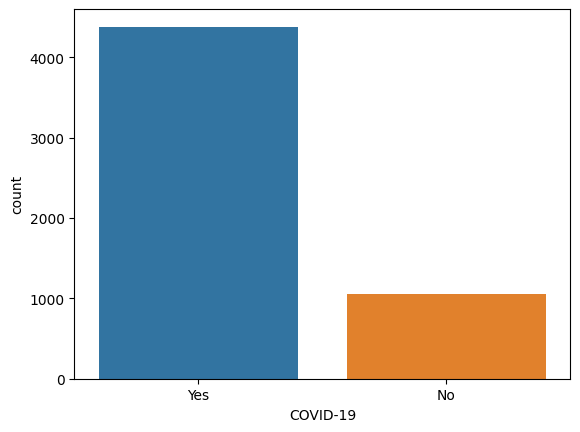

In [37]:
# Tracer un countplot pour la variable cible 'COVID-19' pour savoir l'equilibre des classes dans notre dataset 
sns.countplot(x = 'COVID-19', data = covid)

## Préparation des données
Puisque les valeurs que nous avons sont catégorielles, nous allons utiliser la classe *LabelEncoder* permet de transformer des labels non numériques en labels numériques. Cela nous permet de préparer les données avant d’utiliser certains algorithmes d’apprentissage automatique qui nécessitent des entrées numériques.

In [39]:
# creation d une instance e de la classe LabelEncoder
e=LabelEncoder()

#La méthode fit_transform va attribuer un nombre entier à chaque valeur unique de chaque colonne
covid['Breathing Problem']=e.fit_transform(covid['Breathing Problem'])
covid['Fever']=e.fit_transform(covid['Fever'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Running Nose']=e.fit_transform(covid['Running Nose'])
covid['Asthma']=e.fit_transform(covid['Asthma'])
covid['Chronic Lung Disease']=e.fit_transform(covid['Chronic Lung Disease'])
covid['Headache']=e.fit_transform(covid['Headache'])
covid['Heart Disease']=e.fit_transform(covid['Heart Disease'])
covid['Diabetes']=e.fit_transform(covid['Diabetes'])
covid['Hyper Tension']=e.fit_transform(covid['Hyper Tension'])
covid['Abroad travel']=e.fit_transform(covid['Abroad travel'])
covid['Contact with COVID Patient']=e.fit_transform(covid['Contact with COVID Patient'])
covid['Attended Large Gathering']=e.fit_transform(covid['Attended Large Gathering'])
covid['Visited Public Exposed Places']=e.fit_transform(covid['Visited Public Exposed Places'])
covid['Family working in Public Exposed Places']=e.fit_transform(covid['Family working in Public Exposed Places'])
covid['Wearing Masks']=e.fit_transform(covid['Wearing Masks'])
covid['Sanitization from Market']=e.fit_transform(covid['Sanitization from Market'])
covid['COVID-19']=e.fit_transform(covid['COVID-19'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Gastrointestinal ']=e.fit_transform(covid['Gastrointestinal '])
covid['Fatigue ']=e.fit_transform(covid['Fatigue '])

In [40]:
covid

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# on calcule la matrice de corrélation entre les différentes variables du DataFrame
corr=covid.corr()
corr.style.background_gradient(cmap='magma',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


Nous allons éliminer certaines variables qui ne sont pas pertinentes pour la construction d'un modèle de prédiction. La suppression de ces variables est basée sur la corrélation qui est faible avec la variable cible ('COVID-19')

In [44]:
covid=covid.drop('Running Nose',axis=1)
covid=covid.drop('Chronic Lung Disease',axis=1)
covid=covid.drop('Headache',axis=1)
covid=covid.drop('Heart Disease',axis=1)
covid=covid.drop('Diabetes',axis=1)
covid=covid.drop('Gastrointestinal ',axis=1)
covid=covid.drop('Wearing Masks',axis=1)
covid=covid.drop('Sanitization from Market',axis=1)
covid=covid.drop('Asthma',axis=1)
covid=covid.drop('Fatigue ',axis=1)

In [46]:
corr=covid.corr()
corr.style.background_gradient(cmap='magma',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.045256,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.079001,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,0.081989,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.042811,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Hyper Tension,0.045256,0.079001,0.081989,0.042811,1.000000,-0.016382,0.027307,0.002911,0.019174,0.048152,0.102575
Abroad travel,0.117795,0.128726,0.331418,0.205986,-0.016382,1.000000,0.080210,0.113399,0.069609,0.143094,0.443875
Contact with COVID Patient,0.214634,0.164704,0.128330,0.189251,0.027307,0.080210,1.000000,0.234649,0.079800,0.006909,0.357122
Attended Large Gathering,0.200304,0.070490,0.117963,0.216438,0.002911,0.113399,0.234649,1.000000,0.083795,0.063776,0.390145
Visited Public Exposed Places,0.066688,0.002252,0.086176,0.079055,0.019174,0.069609,0.079800,0.083795,1.000000,0.028486,0.119755
Family working in Public Exposed Places,0.018295,0.012102,0.163102,0.104378,0.048152,0.143094,0.006909,0.063776,0.028486,1.000000,0.160208


Nous avons crée un DataFrame x qui contient toutes les variables du jeu de données covid sauf la variable cible 'COVID-19'. Cela signifie que x contient les caractéristiques que nous utiliserons pour prédire la variable cible.
Nous avons crée une série y qui contient uniquement la variable cible 'COVID-19'. Cela signifie que y contient les étiquettes que nous souhaitons prédire.

In [47]:
x=covid.drop('COVID-19',axis=1)
y=covid['COVID-19']

#division de dataset en ensemble d entrainement et ensemble de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

## Regression Logistique

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#Score/Accuracy
acc_logreg=model.score(x_test, y_test)*100
acc_logreg

95.76816927322908

## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
#Score/Accuracy
acc_knn=knn.score(x_test, y_test)*100
acc_knn

96.13615455381785

## Naive Baye

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
#Score/Accuracy
acc_gaussian= model.score(x_test, y_test)*100
acc_gaussian

76.08095676172954

## ANN

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [33]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
136/136 [==============================] - 1s 8ms/step - loss: 0.0470 - accuracy: 0.9738 - val_loss: 0.0574 - val_accuracy: 0.9604
Epoch 2/10
136/136 [==============================] - 1s 7ms/step - loss: 0.0463 - accuracy: 0.9724 - val_loss: 0.0558 - val_accuracy: 0.9696
Epoch 3/10
136/136 [==============================] - 1s 10ms/step - loss: 0.0468 - accuracy: 0.9749 - val_loss: 0.0578 - val_accuracy: 0.9568
Epoch 4/10
136/136 [==============================] - 1s 10ms/step - loss: 0.0459 - accuracy: 0.9735 - val_loss: 0.0533 - val_accuracy: 0.9779
Epoch 5/10
136/136 [==============================] - 1s 5ms/step - loss: 0.0459 - accuracy: 0.9742 - val_loss: 0.0560 - val_accuracy: 0.9604
Epoch 6/10
136/136 [==============================] - 1s 8ms/step - loss: 0.0462 - accuracy: 0.9754 - val_loss: 0.0570 - val_accuracy: 0.9678
Epoch 7/10
136/136 [==============================] - 1s 10ms/step - loss: 0.0454 - accuracy: 0.9749 - val_loss: 0.0518 - val_accuracy: 0.9761
Epo

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


34/34 [==============================] - 0s 3ms/step - loss: 0.0630 - accuracy: 0.9586
Loss: 0.06297386437654495
Accuracy: 0.9586016535758972


## **Comparaison des modèles**

En fonction des valeurs d'exactitude (accuracy) que nous avons fournies : 

1. Regression logistique : Accuracy = 95,76%
2. KNN (K-Nearest Neighbors) : Accuracy = 96,13%
3. Naive Bayes : Accuracy = 76,08%
4. ANN (Artificial Neural Network) : Accuracy = 95,86% et Loss = 0,06

En se basant uniquement sur les valeurs d'exactitude, on peut dire que les modèles de régression logistique, KNN et ANN ont des performances similaires, avec des accuracies supérieures à 95%. Cependant le modèle KNN obtient la plus haute accuracy avec 96,13%.

Le modèle Naive Bayes, quant à lui, présente une précision inférieure avec 76,08%.